In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

C:\Users\d816834\AppData\Local\Temp\ipykernel_3832\3218046128.py:1: DtypeWarning: Columns (78,131,138,147,675,678,703,729,731,732,733) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ipca.csv', sep=';', decimal=',', index_col='YearMo')


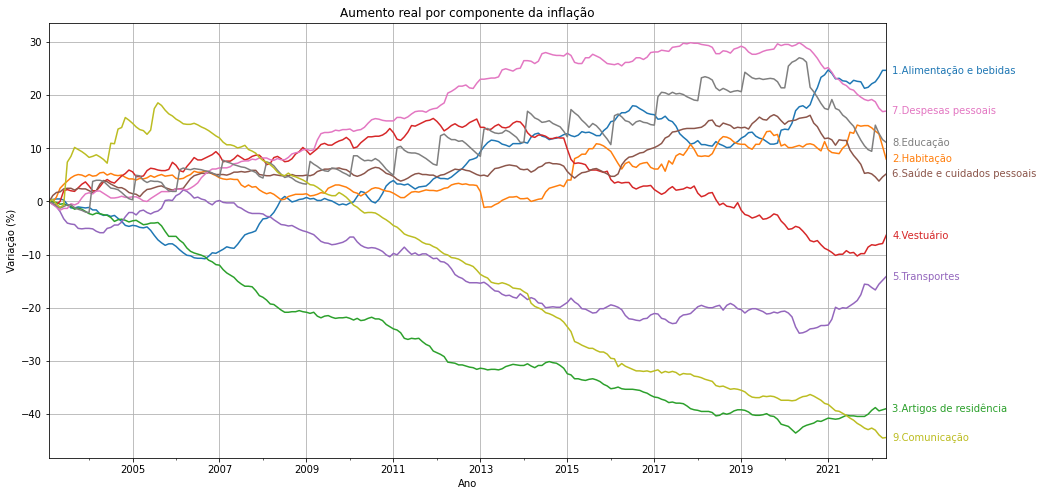

In [70]:
data = pd.read_csv('ipca.csv', sep=';', decimal=',', index_col='YearMo')
categories = pd.read_csv('categories.csv', index_col='CodItem')

items = list(map(lambda x: x+'_real', "7170,7445,7486,7558,7625,7660,7712,7766,7786".split(",")))
data = data[items]
# if sys.argv[2]:
data = data[data.index > int(200301)] 
data['YearMo'] = data.index
names = {}

for column in data.columns:
    if column != 'YearMo':
        first_value = float(data[column][data[column].first_valid_index()])
        names[column] = categories.loc[int(column[:-5])]['DescItem']
        data[column] = data.apply(lambda row : (row[column]/first_value-1)*100, axis=1)

data = data.rename(columns=names)
data['YearMo'] = data.apply(lambda row : pd.to_datetime(str(row['YearMo'])[:4]+'-'+str(row['YearMo'])[4:6]), axis=1)
data.index = data['YearMo']
data = data.drop(columns=['YearMo'])

ax = data.plot(figsize=(15,8), grid=True, xlabel="Ano", ylabel="Variação (%)", title="Aumento real por componente da inflação")
for line, name in zip(ax.lines, data.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1, y), xytext=(6, 0),
                color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                textcoords="offset points", size=10, va="center")
ax.get_legend().remove()
plt.savefig('results.png')
# data.to_csv('results.csv', sep=';', float_format='%.3f', decimal=',', encoding='iso-8859-1', index=False )